In [11]:
import os
import shutil

source_folders = [
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Sunny",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Rainy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR04/Cloudy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR04/Sunny",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR04/Rainy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR05/Cloudy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR05/Sunny",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR05/Rainy"
]

destination_folder = "D:/PARKING/total-content"

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

file_count = 0

for source_folder in source_folders:
    for root, _, files in os.walk(source_folder):
        for file in files:
            file_count += 1
            print("Found file:", os.path.join(root, file))  # DEBUG
            source_file_path = os.path.join(root, file)
            destination_file_path = os.path.join(destination_folder, file)
            shutil.copy(source_file_path, destination_file_path)

print(f"Total files copied: {file_count}")

print("Contents merged successfully.")

Found file: D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy\2012-09-12\2012-09-12_06_05_16.jpg
Found file: D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy\2012-09-12\2012-09-12_06_05_16.xml
Found file: D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy\2012-09-12\2012-09-12_06_10_30.jpg
Found file: D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy\2012-09-12\2012-09-12_06_10_30.xml
Found file: D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy\2012-09-12\2012-09-12_06_15_44.jpg
Found file: D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy\2012-09-12\2012-09-12_06_15_44.xml
Found file: D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy\2012-09-12\2012-09-12_06_20_57.jpg
Found file: D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy\2012-09-12\2012-09-12_06_20_57.xml
Found file: D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy\2012-09-12\2012-09-12_06_26_11.jpg
Found file: D:/PARK

In [ ]:
'''
source_folders = [
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Cloudy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Sunny",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/PUCPR/Rainy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR04/Cloudy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR04/Sunny",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR04/Rainy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR05/Cloudy",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR05/Sunny",
    "D:/PARKING/Parking_Lot_Dataset/PKLot/PKLot/PKLot/UFPR05/Rainy"
]

destination_folder = "D:/PARKING/total-content"

if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Iterate through source folders and merge contents
for source_folder in source_folders:
    for root, _, files in os.walk(source_folder):
        for file in files:
            source_file_path = os.path.join(root, file)
            destination_file_path = os.path.join(destination_folder, file)
            shutil.copy(source_file_path, destination_file_path)

print("Contents merged successfully.")'''

Contents merged successfully.


In [12]:
import xml.etree.ElementTree as ET

input_folder = "D:/PARKING/total-content"
output_folder = "D:/PARKING/labels-xml"

image_width = 1280
image_height = 720

class_mapping = {"1": 1, "0": 0}

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

xml_files = [f for f in os.listdir(input_folder) if f.endswith(".xml")]
for xml_file in xml_files:
    xml_path = os.path.join(input_folder, xml_file)
    
    tree = ET.parse(xml_path)
    root = tree.getroot()
    
    txt_filename = os.path.splitext(xml_file)[0] + ".txt"
    txt_path = os.path.join(output_folder, txt_filename)

    with open(txt_path, "w") as txt_file:
        for space in root.findall("space"):
            occupied = space.get("occupied")
            class_index = class_mapping.get(occupied, -1)
            
            if class_index == -1:
                continue
            
            rotated_rect = space.find("rotatedRect")
            center = rotated_rect.find("center")
            size = rotated_rect.find("size")
            
            center_x = float(center.get("x"))
            center_y = float(center.get("y"))
            width = float(size.get("w"))
            height = float(size.get("h"))
            
            x_center = center_x / image_width
            y_center = center_y / image_height
            w = width / image_width
            h = height / image_height
            
            txt_file.write(f"{class_index} {x_center:.6f} {y_center:.6f} {w:.6f} {h:.6f}\n")
    
    new_xml_path = os.path.join(output_folder, xml_file)
    os.rename(xml_path, new_xml_path)

print("Annotations generated and XML files moved.")

Annotations generated and XML files moved.


In [14]:
# Move the txt files from the xml folder to the total-content folder

source_folder = "D:/PARKING/labels-xml"
destination_folder = "D:/PARKING/total-content"

txt_files = [f for f in os.listdir(source_folder) if f.endswith(".txt")]

for txt_file in txt_files:
    source_path = os.path.join(source_folder, txt_file)
    destination_path = os.path.join(destination_folder, txt_file)
    shutil.move(source_path, destination_path)

print("TXT files moved to D:/PARKING/total-content folder.")

TXT files moved to D:/PARKING/total-content folder.


In [16]:
import random
import os

# remove the image that has no corresponding txt file

file_path = "D:/PARKING/total-content/2012-11-06_18_48_46.jpg"
try:
    os.remove(file_path)
    print(f"File '{file_path}' has been removed successfully.")
except OSError as e:
    print(f"Error removing the file '{file_path}': {e}")


source_folder = "D:/PARKING/total-content"
train_folder = "D:/PARKING/train"
test_folder = "D:/PARKING/test"
val_folder = "D:/PARKING/val"

train_ratio = 0.7
test_ratio = 0.15
val_ratio = 0.15

for folder in [train_folder, test_folder, val_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder)

all_files = os.listdir(source_folder)
image_files = [f for f in all_files if f.endswith(".jpg")]

# Calculate the number of samples for each split
num_samples = len(image_files)
num_train = int(train_ratio * num_samples)
num_test = int(test_ratio * num_samples)
num_val = num_samples - num_train - num_test

random.shuffle(image_files)

train_files = image_files[:num_train]
test_files = image_files[num_train:num_train + num_test]
val_files = image_files[num_train + num_test:]

# Move corresponding txt files along with images
for folder, files in [(train_folder, train_files), (test_folder, test_files), (val_folder, val_files)]:
    for file in files:
        # Move image file
        source_image_path = os.path.join(source_folder, file)
        destination_image_path = os.path.join(folder, file)
        shutil.move(source_image_path, destination_image_path)
        
        # Move corresponding txt file
        txt_file = os.path.splitext(file)[0] + ".txt"
        source_txt_path = os.path.join(source_folder, txt_file)
        destination_txt_path = os.path.join(folder, txt_file)
        shutil.move(source_txt_path, destination_txt_path)

print("Data split into train, test, and val sets.")

File 'D:/PARKING/total-content/2012-11-06_18_48_46.jpg' has been removed successfully.
Data split into train, test, and val sets.


In [17]:
# Organize the datasets into the following structure:
# data
# ├── train
# │   ├── images
# │   └── labels
# ├── val
# │   ├── images
# │   └── labels
# └── test
#     ├── images
#     └── labels


datasets = ['train', 'val', 'test']
source_folder = 'D:/PARKING'

for dataset in datasets:
	dataset_folder = os.path.join(source_folder, dataset)
	
	# Create "images" and "labels" folders
	images_folder = os.path.join(dataset_folder, "images")
	labels_folder = os.path.join(dataset_folder, "labels")
	os.makedirs(images_folder, exist_ok=True)
	os.makedirs(labels_folder, exist_ok=True)
	
	# Organize image and label files
	for file in os.listdir(dataset_folder):
		if file.endswith(".jpg"):
			image_path = os.path.join(dataset_folder, file)
			image_destination = os.path.join(images_folder, file)
			shutil.move(image_path, image_destination)
		elif file.endswith(".txt"):
			label_path = os.path.join(dataset_folder, file)
			label_destination = os.path.join(labels_folder, file)
			shutil.move(label_path, label_destination)

print("Datasets organized successfully.")

Datasets organized successfully.


In [ ]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")

In [22]:
# Fine tuning

model.train(data="D:/PARKING/data.yaml", epochs=2)

Ultralytics 8.3.145  Python-3.10.16 torch-2.5.1 CPU (13th Gen Intel Core(TM) i7-1355U)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=D:/PARKING/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=2, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True

100%|██████████| 755k/755k [00:00<00:00, 3.32MB/s]

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               


  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  8                  -1  1   1838080  ultralytics.nn.modules.block.C2f             [512, 512, 1, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  1    591360  ultralytics.nn.modules.block.C2f             [768,

train: Scanning D:\PARKING\train\labels... 8691 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8691/8691 [00:45<00:00, 190.55it/s]


train: New cache created: D:\PARKING\train\labels.cache
val: Fast image access  (ping: 0.20.1 ms, read: 23.97.7 MB/s, size: 311.3 KB)


val: Scanning D:\PARKING\val\labels... 1863 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1863/1863 [00:07<00:00, 241.22it/s]


val: New cache created: D:\PARKING\val\labels.cache
Plotting labels to runs\detect\train4\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train4
Starting training for 2 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/2         0G      1.418     0.8505      1.034        270        640: 100%|██████████| 544/544 [2:32:47<00:00, 16.85s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [07:20<00:00,  7.47s/it]


                   all       1863     105376      0.939      0.989      0.982      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/2         0G      0.792     0.4475     0.8427        126        640: 100%|██████████| 544/544 [2:32:49<00:00, 16.86s/it]  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [07:07<00:00,  7.25s/it]

                   all       1863     105376      0.958      0.987       0.99      0.867



2 epochs completed in 5.335 hours.
Optimizer stripped from runs\detect\train4\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\train4\weights\best.pt, 22.5MB

Validating runs\detect\train4\weights\best.pt...
Ultralytics 8.3.145  Python-3.10.16 torch-2.5.1 CPU (13th Gen Intel Core(TM) i7-1355U)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 59/59 [06:10<00:00,  6.28s/it]


                   all       1863     105376      0.958      0.987       0.99      0.867
                 empty       1567      53945      0.971      0.991      0.992      0.882
              occupied       1477      51431      0.945      0.983      0.989      0.851
Speed: 2.2ms preprocess, 173.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs\detect\train4


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002B1CA2D7970>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0

In [24]:
from PIL import Image

test_images_directory = "D:/PARKING/test/images"

image_files = [f for f in os.listdir(test_images_directory) if f.lower().endswith(".jpg")]

random_image_filename = random.choice(image_files)
random_image_path = os.path.join(test_images_directory, random_image_filename)

results = model.predict(random_image_path)

result = results[0]

print(len(result.boxes))


image 1/1 D:\PARKING\test\images\2013-03-15_15_20_11.jpg: 384x640 40 occupieds, 191.1ms
Speed: 2.1ms preprocess, 191.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)
40


In [25]:
for box in result.boxes:
	label = result.names[box.cls[0].item()]
	coords = [round(x) for x in box.xyxy[0].tolist()]
	prob = round(box.conf[0].item(), 4)
	print("Object: {}\nCoordinates: {}\nProbability: {}".format(label, coords, prob))

Object: occupied
Coordinates: [411, 178, 463, 288]
Probability: 0.9147
Object: occupied
Coordinates: [510, 140, 553, 251]
Probability: 0.9102
Object: occupied
Coordinates: [671, 373, 738, 499]
Probability: 0.9101
Object: occupied
Coordinates: [952, 115, 1000, 212]
Probability: 0.904
Object: occupied
Coordinates: [845, 45, 888, 140]
Probability: 0.9019
Object: occupied
Coordinates: [379, 13, 411, 95]
Probability: 0.9002
Object: occupied
Coordinates: [1088, 210, 1139, 310]
Probability: 0.8981
Object: occupied
Coordinates: [813, 136, 870, 207]
Probability: 0.8968
Object: occupied
Coordinates: [636, 504, 718, 681]
Probability: 0.8893
Object: occupied
Coordinates: [760, 458, 836, 582]
Probability: 0.8889
Object: occupied
Coordinates: [635, 14, 696, 64]
Probability: 0.8873
Object: occupied
Coordinates: [577, 415, 647, 569]
Probability: 0.8866
Object: occupied
Coordinates: [763, 108, 824, 162]
Probability: 0.8844
Object: occupied
Coordinates: [797, 23, 837, 102]
Probability: 0.8791
Object: oc

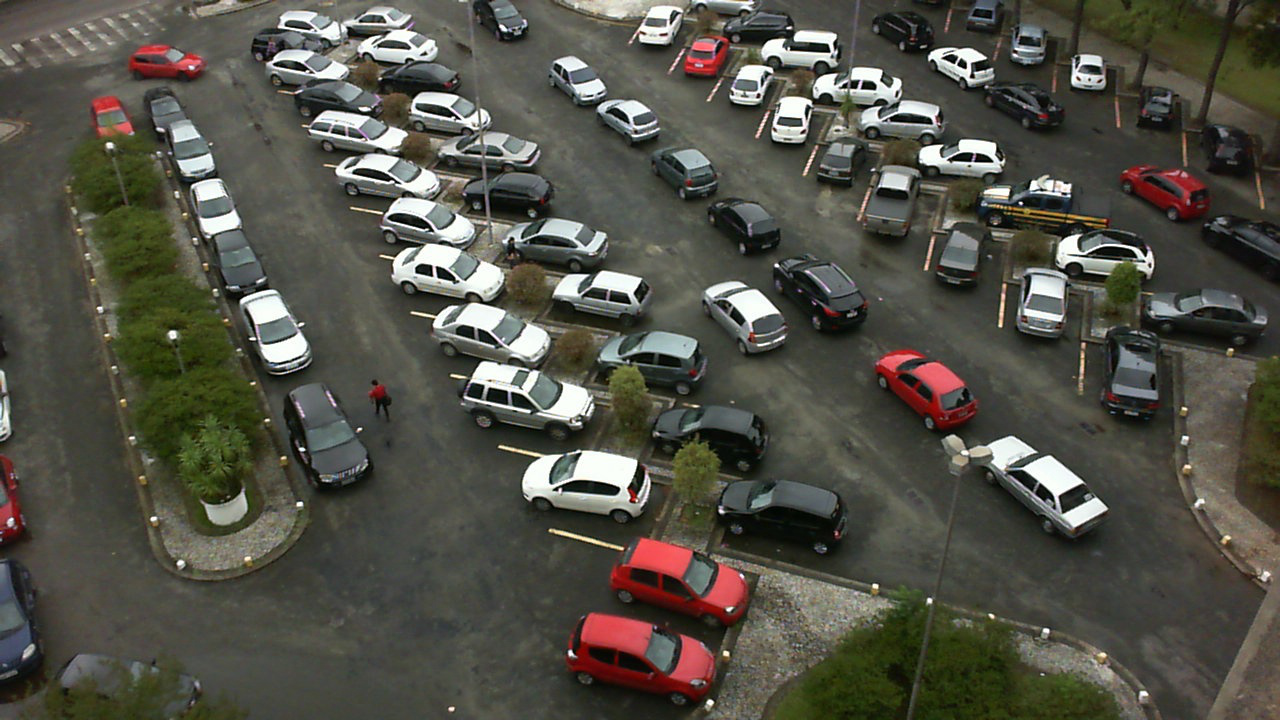

In [26]:
# Original image

Image.open(random_image_path)

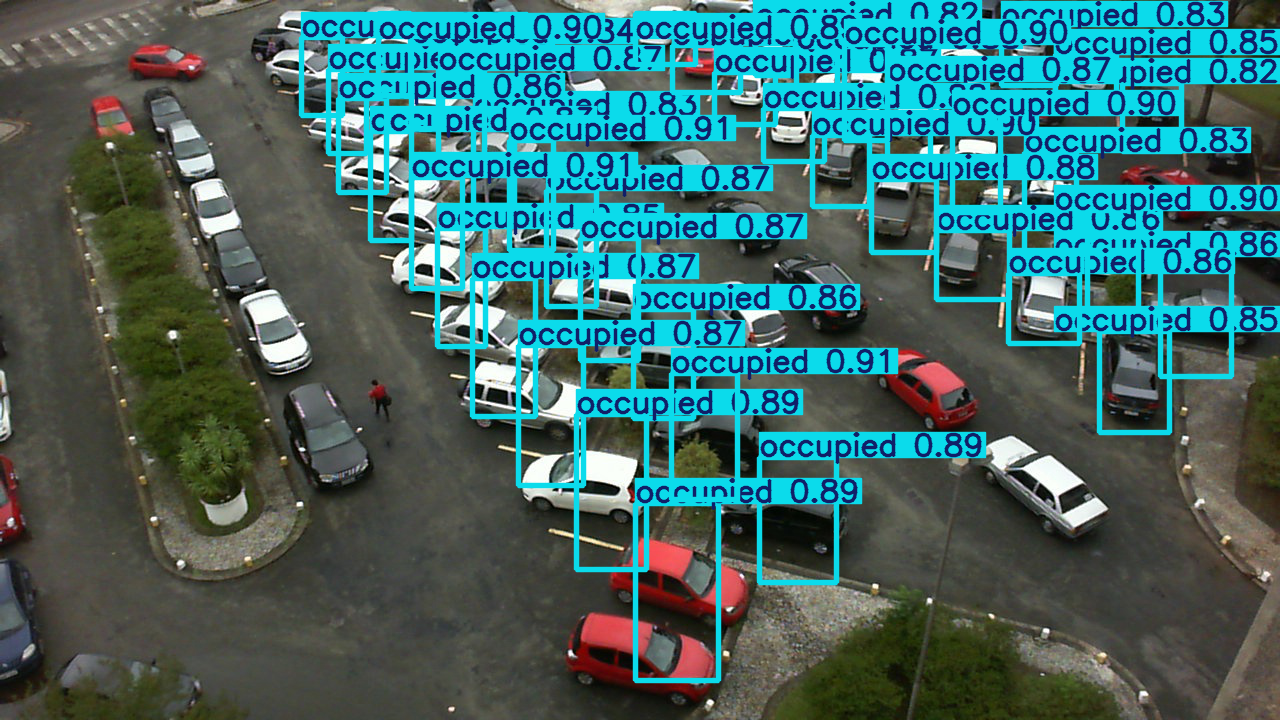

In [27]:
# Image with the result of the model

Image.fromarray(result.plot()[:,:,::-1])